<a href="https://colab.research.google.com/github/sirisha4848/Air-Quality-Index/blob/main/python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
data = pd.read_csv('AirQuality.csv', delimiter=';')
data = data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
data.columns = [col.strip().lower() for col in data.columns]
print(data.head())

         date      time co(gt)  pt08.s1(co)  nmhc(gt) c6h6(gt)  pt08.s2(nmhc)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   nox(gt)  pt08.s3(nox)  no2(gt)  pt08.s4(no2)  pt08.s5(o3)     t    rh  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       ah  
0  0,7578  
1  0,7255  
2  0,7502  
3  0,786

In [28]:
data = data.dropna()

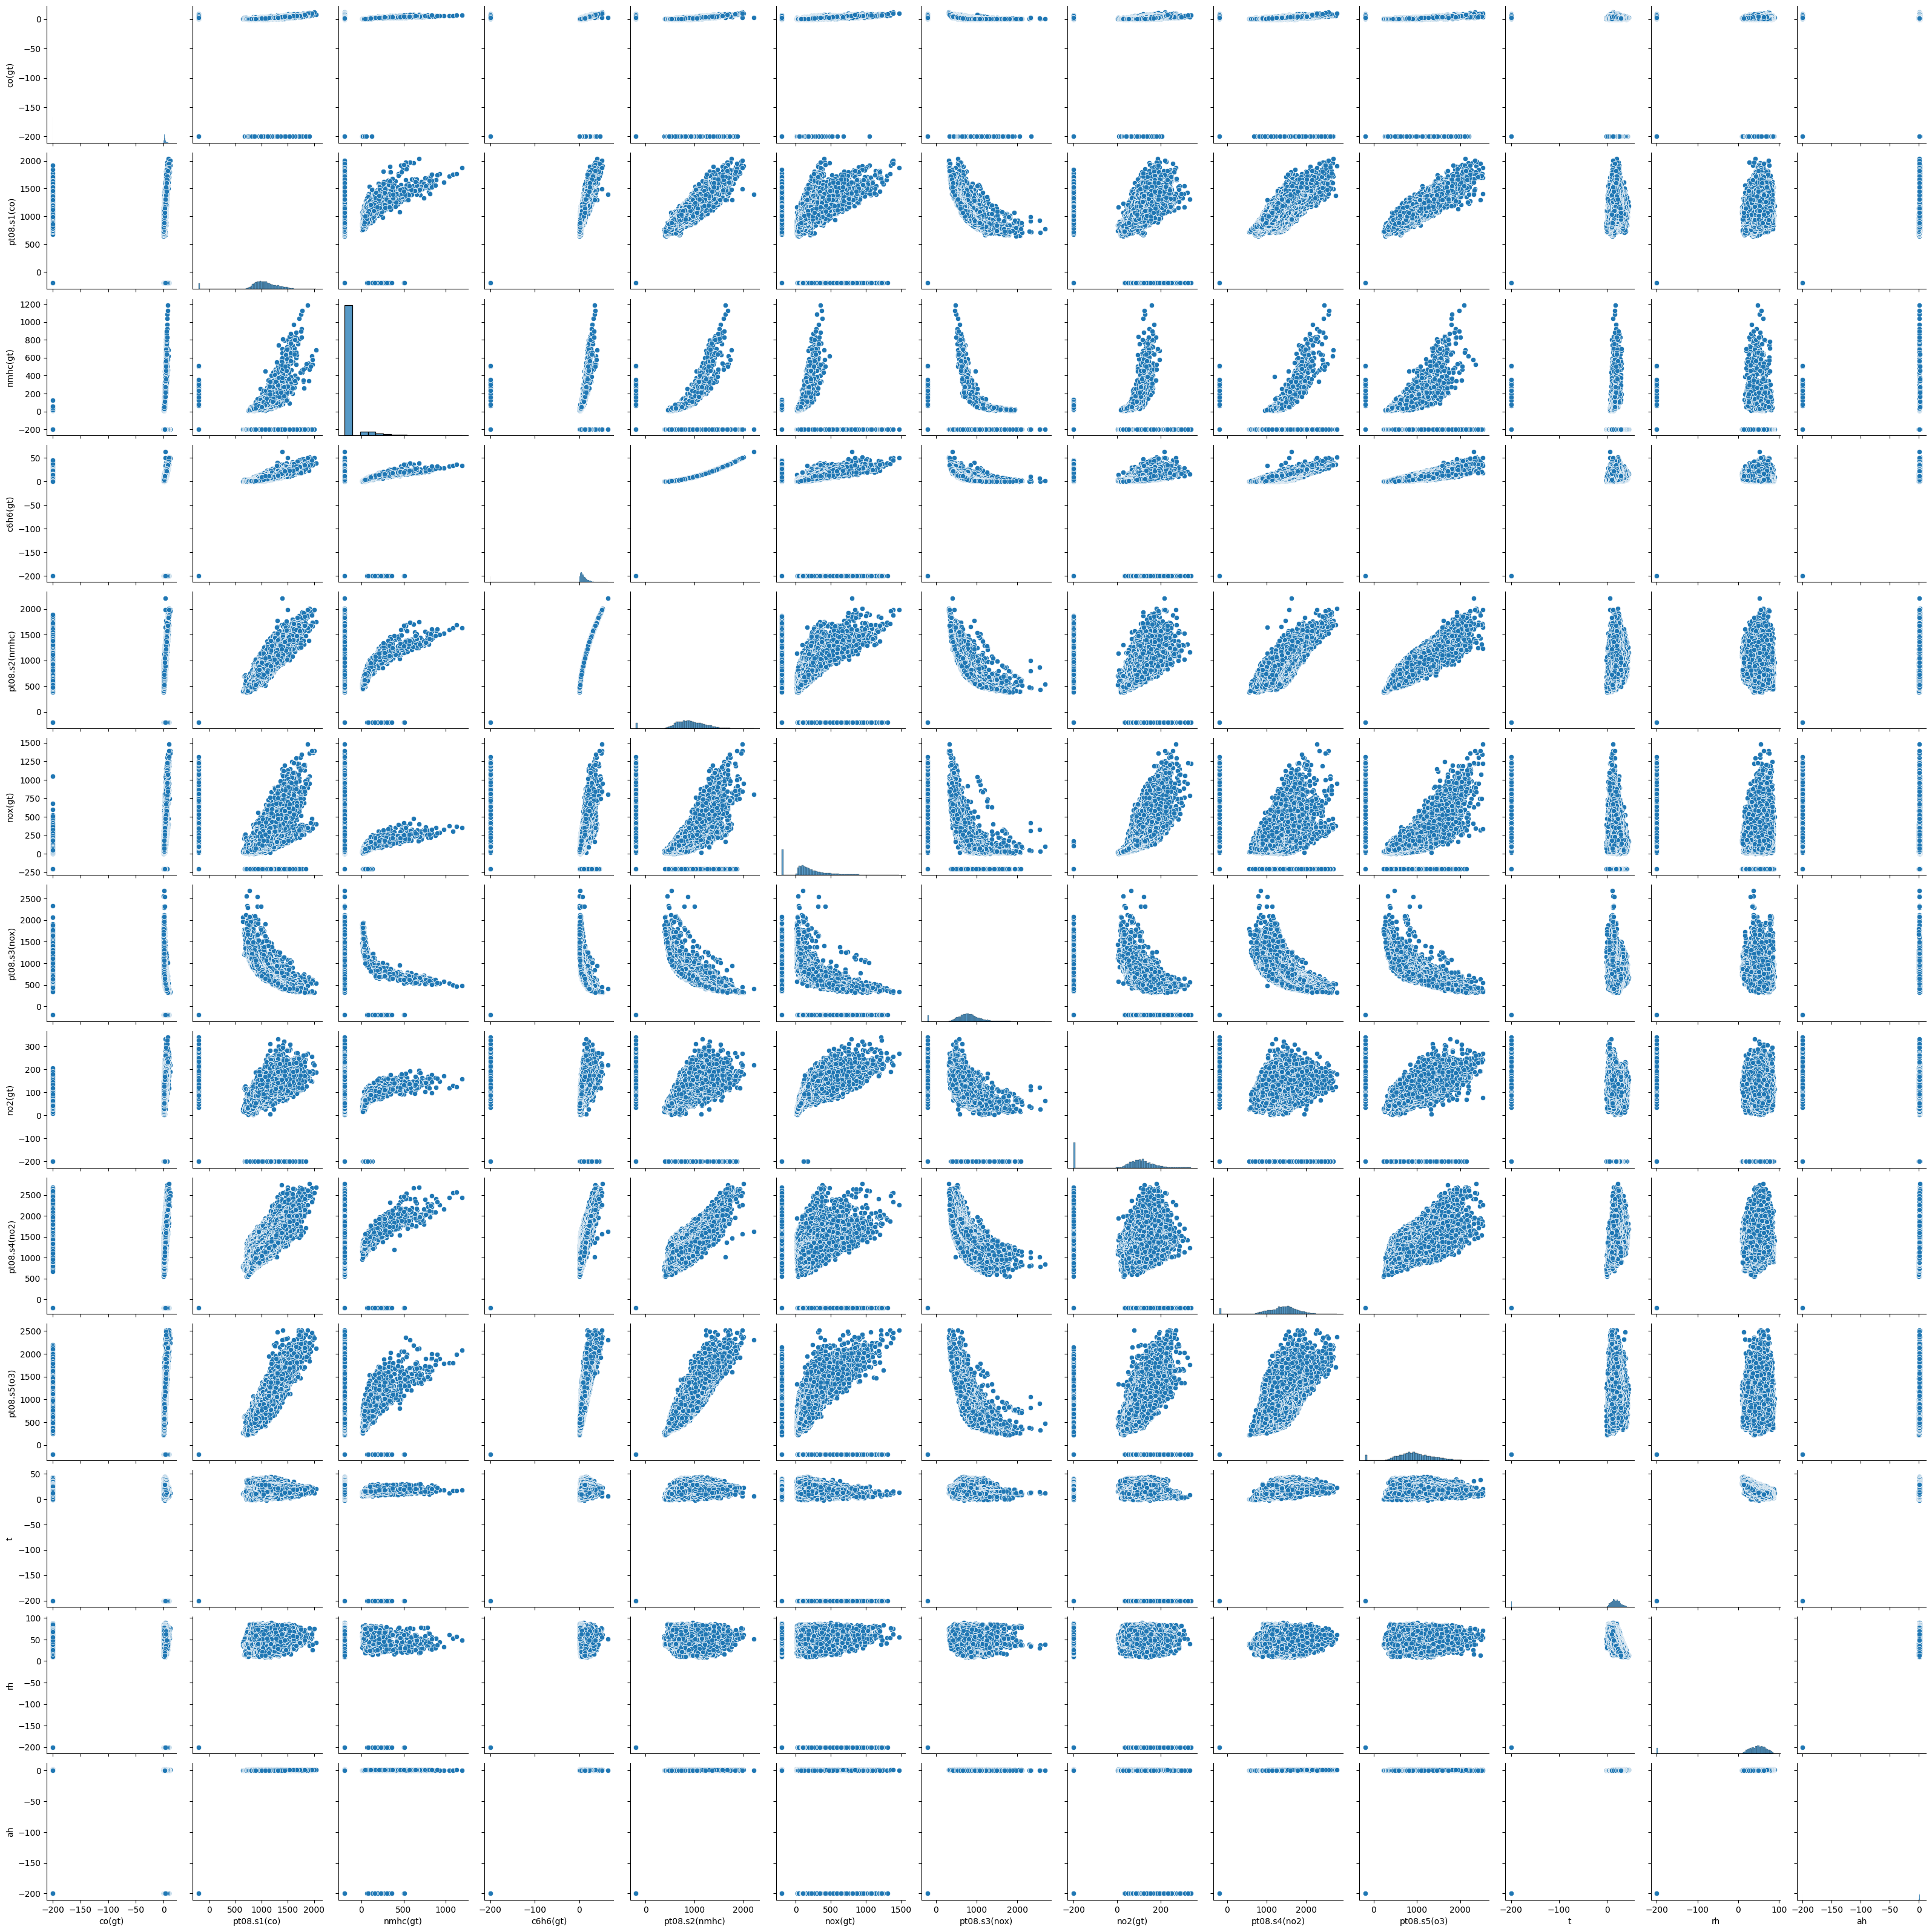

<Axes: >

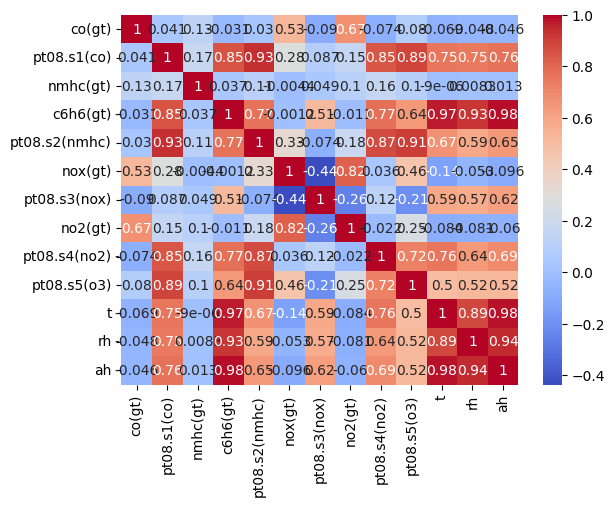

In [33]:
# Convert relevant columns to numeric, coercing errors to NaN
for col in data.columns:
  if col not in ['date', 'time']:
    # Replace commas with periods before converting to numeric
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')

sns.pairplot(data)
plt.show()

corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [21]:
print(data.columns)

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')


In [24]:
X = data[['co(gt)', 'pt08.s1(co)', 'c6h6(gt)', 'pt08.s2(nmhc)', 'nox(gt)', 'pt08.s3(nox)', 'no2(gt)', 'pt08.s4(no2)', 'pt08.s5(o3)', 't', 'rh', 'ah']]
y = data['pt08.s2(nmhc)']

In [30]:
X = data[['co(gt)', 'pt08.s1(co)', 'c6h6(gt)', 'pt08.s2(nmhc)', 'nox(gt)', 'pt08.s3(nox)', 'no2(gt)', 'pt08.s4(no2)', 'pt08.s5(o3)', 't', 'rh', 'ah']]
y = data['pt08.s2(nmhc)']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X = data[['co(gt)', 'pt08.s1(co)', 'c6h6(gt)', 'pt08.s2(nmhc)', 'nox(gt)', 'pt08.s3(nox)', 'no2(gt)', 'pt08.s4(no2)', 'pt08.s5(o3)', 't', 'rh', 'ah']]
y = data['pt08.s2(nmhc)']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [38]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 0.15185363247862146
Mean Squared Error: 2.6383734508547088
R2 Score: 0.9999774145685985


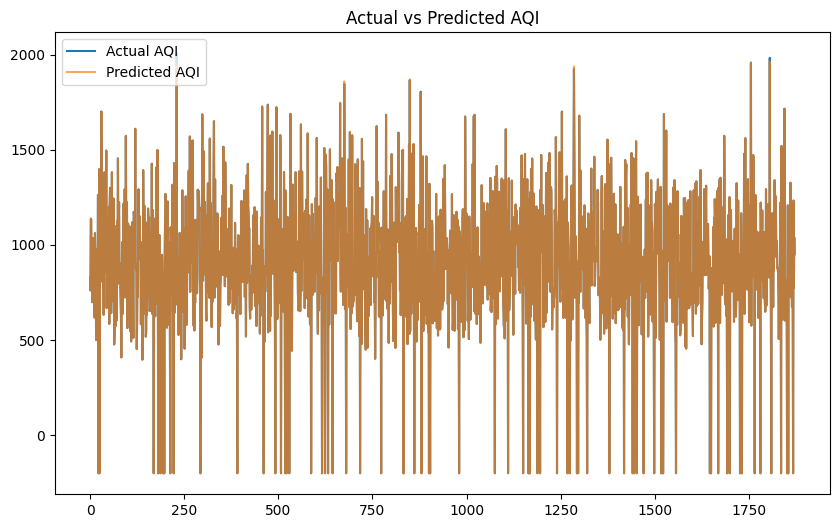

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual AQI')
plt.plot(y_pred, label='Predicted AQI', alpha=0.7)
plt.title('Actual vs Predicted AQI')
plt.legend()
plt.show()